In [1]:
#Importing Modules and Keys
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt 
import numpy as np
import math
import gmaps
from scipy.stats import linregress
from config import g_key
gmaps.configure(api_key=g_key)
from pprint import pprint
from config import openWeatherKey


In [13]:
disasterdataCSV = "Resources/disaster_data.csv"
Data_disaster_df = pd.read_csv(disasterdataCSV)
# Data_disaster_df

weatherDisasterSouth_EastCSV = "output_data/NEW_coordinates.csv"
wDisaster_df = pd.read_csv(weatherDisasterSouth_EastCSV)
# wDisaster_df

SE_wDisaster_df = wDisaster_df.loc[(wDisaster_df["Long"]>-90) & (wDisaster_df["Lat"]<38),["Location","Dis No","Lat", "Long"]]
# SE_wDisaster_df

SE_Data_list_df = pd.merge(SE_wDisaster_df, Data_disaster_df, on="Dis No", how="left").rename(columns={"Location_x": "Location"})
# SE_Data_list_df

SE_Data_list_df["Disaster Type"].unique()

trimmed_df = SE_Data_list_df.drop_duplicates(subset= "Dis No", keep="first")
# trimmed_df

Disastercount_df = trimmed_df.groupby(["Disaster Subtype"]).agg({"Location":"count","Total Deaths":"sum","No Injured":"sum","No Affected":"sum","No Homeless":"sum",
                                           "Total Affected":"sum","Insured Damages ('000 US$)":"sum","Total Damages ('000 US$)":"sum"})
# Disastercount_df = trimmed_df.groupby(["Disaster Subtype"]).sum(["Location"])
Disastercount_df = Disastercount_df.reset_index(drop=False)
# Disastercount_df


#Total covered by Insuance
insurance_coverage = trimmed_df.groupby(["Year","Dis No"]).sum()
keycolumns = ["Total Deaths", "No Injured", "No Affected", "No Homeless", "Total Affected", "Insured Damages ('000 US$)", "Total Damages ('000 US$)"]
insurance_coverage = insurance_coverage.loc[:,keycolumns].reset_index(drop=False)
# insurance_coverage

DesiredColumn = desiredColumns = ["Dis No","Total Deaths", "No Injured", "No Affected", "No Homeless", 
                                  "Total Affected", "Insured Damages ('000 US$)", "Total Damages ('000 US$)"]
insurance = trimmed_df.groupby("Year").agg({"Dis No":"count","Total Deaths":"sum","No Injured":"sum","No Affected":"sum","No Homeless":"sum",
                                           "Total Affected":"sum","Insured Damages ('000 US$)":"sum","Total Damages ('000 US$)":"sum"})
insurance = insurance.loc[:,desiredColumns].reset_index(drop=False)
# insurance

([<matplotlib.axis.XTick at 0x7fbb34f03eb0>,
 [Text(0, 0, 'Cold wave'),
  Text(1, 0, 'Convective storm'),
  Text(2, 0, 'Drought'),
  Text(3, 0, 'Flash flood'),
  Text(4, 0, 'Forest fire'),
  Text(5, 0, 'Heat wave'),
  Text(6, 0, 'Land fire (Brush, Bush, Pasture)'),
  Text(7, 0, 'Riverine flood'),
  Text(8, 0, 'Severe winter conditions'),
  Text(9, 0, 'Tropical cyclone'),
  Text(10, 0, 'Viral disease')])

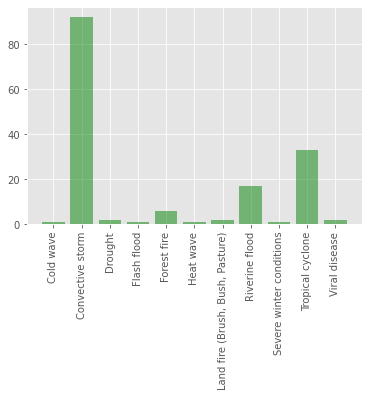

In [14]:
#Counts of Disasters
xaxis = np.arange(len(Disastercount_df))
tick_locations = [value for value in xaxis]
yaxis = Disastercount_df["Location"]
plt.bar(xaxis, yaxis, color='g', alpha=0.5, align="center")
plt.style.use("ggplot")
plt.xticks(tick_locations, Disastercount_df["Disaster Subtype"], rotation= "vertical")
# xaxis


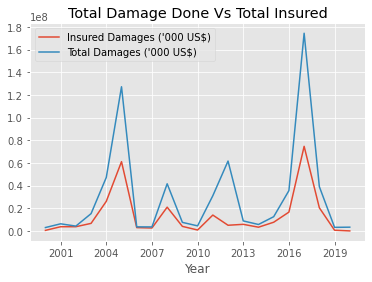

In [27]:
# Total Damanges and Insured Damanges
PlotThis = ["Insured Damages ('000 US$)","Total Damages ('000 US$)"]
df = insurance
lines = df.plot(kind="line",x="Year",y=PlotThis)
lines.xaxis.set_major_locator(plt.MaxNLocator(8))
lines.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.title("Total Damage Done Vs Total Insured")
plt.savefig("output-graphs/SE_total_dam_tot_insured.png")

Text(0.5, 1.0, 'Disaster count')

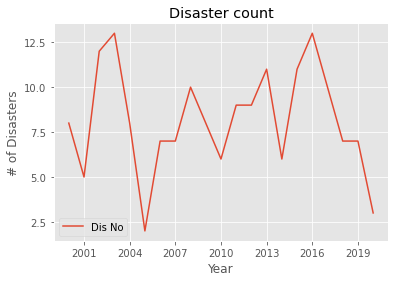

In [28]:
# Disasters per Year
PlotThis = ["Dis No"]
df = insurance
Dis_count = insurance.plot(kind="line",x="Year",y=PlotThis)
Dis_count.xaxis.set_major_locator(plt.MaxNLocator(8))
Dis_count.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.ylabel('# of Disasters')  
plt.savefig("output-graphs/SE_Disaster_count.png")
  
# displaying the title 
plt.title("Disaster count")

Text(0.5, 1.0, 'Total Death and Injuries per Year')

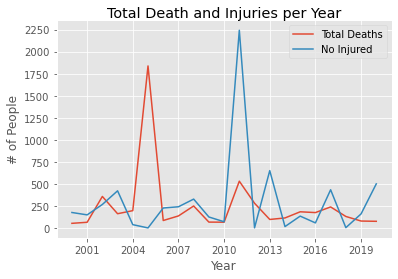

In [29]:
# Total Death and Injuries per Year
PlotThis = ["Total Deaths", "No Injured"]
df = insurance
DeathInjury = df.plot(kind="line",x="Year",y=PlotThis)
DeathInjury.xaxis.set_major_locator(plt.MaxNLocator(8))
DeathInjury.yaxis.set_major_locator(plt.MaxNLocator(10))

plt.ylabel('# of People')  
plt.savefig("output-graphs/SE_total_death_count.png")

  
# displaying the title 
plt.title(label='Total Death and Injuries per Year',  
          fontweight=10,  
          pad='2.0')

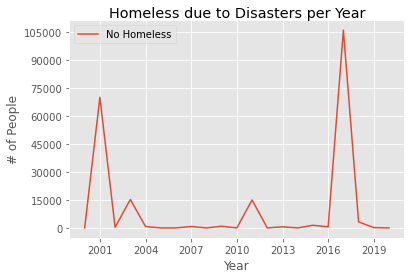

In [30]:
# Homeless due to Disasters per Year
PlotThis = ["No Homeless"]
df = YearlyMerged
Homeless = df.plot(kind="line",x="Year",y=PlotThis)
Homeless.xaxis.set_major_locator(plt.MaxNLocator(8))
Homeless.yaxis.set_major_locator(plt.MaxNLocator(10))

plt.ylabel('# of People')  
  
# displaying the title 
plt.title(label='Homeless due to Disasters per Year',  
          fontweight=10,  
          pad='2.0')
plt.savefig("output-graphs/SE_total_homeless_count.png")


Text(0.5, 1.0, 'Types of Disasters per Year')

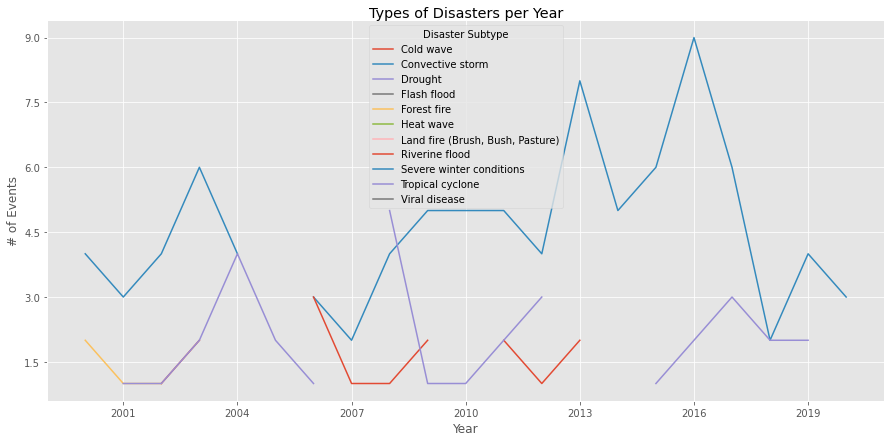

In [18]:
# Types of Disasters by Year
Types =  pd.DataFrame(trimmed_df.groupby('Year')['Disaster Subtype'].value_counts())
df = Types
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
trimmed_df.groupby('Year')['Disaster Subtype'].value_counts().unstack().plot(ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(8))
ax.yaxis.set_major_locator(plt.MaxNLocator(8))

plt.ylabel('# of Events')  
  
# displaying the title 
plt.title(label='Types of Disasters per Year',  
          fontweight=10,  
          pad='2.0')

In [8]:
# Leo's Disaster Type Analysis

In [11]:
#regionalDisGroupby

In [21]:
# Tyson's Stuff

In [19]:
#len(FirstQuintant["Location"].unique())
#FirstQuintant["Disaster Type"].unique()

In [20]:
trimmed_df = FirstQuintant.drop_duplicates(subset= "Dis No", keep="first")
Disastercount_df = trimmed_df.groupby(["Disaster Type", "Disaster Subtype"]).agg({"Location":"count","Total Damages ('000 US$)":"sum"})
locations = trimmed_df[["Lat", "Long"]]
ratings = trimmed_df["Total Damages ('000 US$)"].astype(float)
max_damages = max(trimmed_df["Total Damages ('000 US$)"])
year_list = trimmed_df["Year"].unique()
#year_list

yearly_max_dam = []
for year in year_list:
    yearly_df = trimmed_df.loc[trimmed_df["Year"] == year, ["Total Damages ('000 US$)"]].fillna(0)
    max_dam = max(yearly_df["Total Damages ('000 US$)"])
    yearly_max_dam.append(max_dam)  
#print(yearly_max_dam)

trimmed_year_df = trimmed_df.groupby(["Year"]).agg({"Total Damages ('000 US$)":"max"})
# trimmed_year_df = max(trimmed_year_df[trimmed_year_df["Total Damages ('000 US$)"]])

trimmed_year_df = trimmed_year_df.dropna()
trimmed_year_df["Max Dam"] = yearly_max_dam
#trimmed_year_df

In [21]:
trimmed_df.loc[trimmed_df["Year"] == 2019, ["Total Damages ('000 US$)"]]
trimmed_df["Total Damages ('000 US$)"].fillna(0)

0       350000.0
6            0.0
8        28500.0
9            0.0
14      500000.0
         ...    
562     600000.0
563    1200000.0
568    1000000.0
574    1200000.0
577    1100000.0
Name: Total Damages ('000 US$), Length: 172, dtype: float64

In [22]:
trimmed_year_df = trimmed_df.groupby(["Year"]).agg({"Total Damages ('000 US$)":"max"})
trimmed_year_df = trimmed_year_df.dropna()
trimmed_year_df
maxdamage_latlong_df = pd.merge(trimmed_year_df,trimmed_df, on=["Year","Total Damages ('000 US$)"], how="left")
maxdamage_latlong_df = maxdamage_latlong_df[["Year","Total Damages ('000 US$)","Location","Dis No","Lat","Long"]]
#maxdamage_latlong_df

locations1 = maxdamage_latlong_df[["Lat", "Long"]]
ratings1 = maxdamage_latlong_df["Total Damages ('000 US$)"].astype(float)
max_damages1 = max(maxdamage_latlong_df["Total Damages ('000 US$)"])

In [32]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights = ratings, dissipating=False, max_intensity=10000000,point_radius=1)
fig.add_layer(heat_layer)
plt.savefig("output-graphs/SE_Disaster_map.png")
fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

In [25]:
locations1 = maxdamage_latlong_df[["Lat", "Long"]]
ratings1 = maxdamage_latlong_df["Total Damages ('000 US$)"].astype(float)
max_damages1 = max(maxdamage_latlong_df["Total Damages ('000 US$)"])

In [33]:
# Using the template add the hotel marks to the heatmap
info_box_content = """
<dt>Year</dt><dd>{Year}</dd>
<dt>Disaster Number</dt><dd>{Dis No}</dd>
<dt>Total Damages</dt><dd>{Total Damages ('000 US$)}</dd>
</dl>
"""
year_info = [info_box_content.format(**row) for index, row in maxdamage_latlong_df.iterrows()]
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
year_info = [info_box_content.format(**row) for index, row in maxdamage_latlong_df.iterrows()]
locations1 = maxdamage_latlong_df[["Lat", "Long"]]


#Add marker to heat map
markers = gmaps.marker_layer(locations1,info_box_content=year_info)
fig.add_layer(markers)
plt.savefig("output-graphs/SE_Disaster_toptwentymap.png")

fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>